# Análisis económico de diciembre 2022

## Descarga

In [1]:
#Importar librerías.
import numpy as np
import pandas as pd
from limpiar import columnas_amarillo, dt_amarillo, nulos_amarillo
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#Diccionario.
d_amarillo = pd.read_pickle('../data/tlc_amarillos')

In [3]:
#Descargar tabla de Diciembre de 2022.
exec(d_amarillo['yellow_2022_13'])

In [4]:
#Limpiar taxis amarillos.
columnas_amarillo(yellow_2022_13)
dt_amarillo(yellow_2022_13)
nulos_amarillo(yellow_2022_13)

Se eliminaron las columnas: VendorID, RatecodeID store_and_fwd


## 1. Tarifa por distancia.

In [5]:
#Tarifa por distancia base sin cargos adicionales.
yellow_2022_13['rate_per_mile'] = yellow_2022_13['fare_amount']/yellow_2022_13['trip_distance']

In [16]:
yellow_2022_13

,pickup_day,pickup_time,dropoff_day,dropoff_time,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,rate_per_mile
0,2022-12-01,00:37:35,2022-12-01,00:47:35,1.0,2.00,170,237,1,8.50,3.00,0.5,3.10,0.0,0.3,15.40,2.5,0.00,4.250000
1,2022-12-01,00:34:35,2022-12-01,00:55:21,0.0,8.40,138,141,2,26.00,4.25,0.5,0.00,0.0,0.3,31.05,2.5,1.25,3.095238
2,2022-12-01,00:33:26,2022-12-01,00:37:34,1.0,0.80,140,140,1,5.00,3.00,0.5,1.76,0.0,0.3,10.56,2.5,0.00,6.250000
3,2022-12-01,00:45:51,2022-12-01,00:53:16,1.0,3.00,141,79,3,10.00,3.00,0.5,0.00,0.0,0.3,13.80,2.5,0.00,3.333333
4,2022-12-01,00:49:49,2022-12-01,00:54:13,1.0,0.76,261,231,1,5.00,0.50,0.5,1.76,0.0,0.3,10.56,2.5,0.00,6.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399544,2022-12-31,23:46:00,2023-01-01,00:11:00,1.0,11.56,16,36,0,39.55,0.00,0.5,8.21,0.0,1.0,49.26,0.0,0.00,3.421280
3399545,2022-12-31,23:13:24,2022-12-31,23:29:08,1.0,5.06,75,50,0,26.23,0.00,0.5,0.00,0.0,1.0,30.23,0.0,0.00,5.183794
3399546,2022-12-31,23:00:49,2022-12-31,23:26:57,1.0,13.35,168,197,0,47.73,0.00,0.5,9.85,0.0,1.0,59.08,0.0,0.00,3.575281
3399547,2022-12-31,23:02:50,2022-12-31,23:16:05,1.0,0.00,238,116,0,12.74,0.00,0.5,0.00,0.0,1.0,16.74,0.0,0.00,inf


In [13]:
#Tarifa por distancia total.
yellow_2022_13['total_per_mile'] = yellow_2022_13['total_amount']/yellow_2022_13['trip_distance']

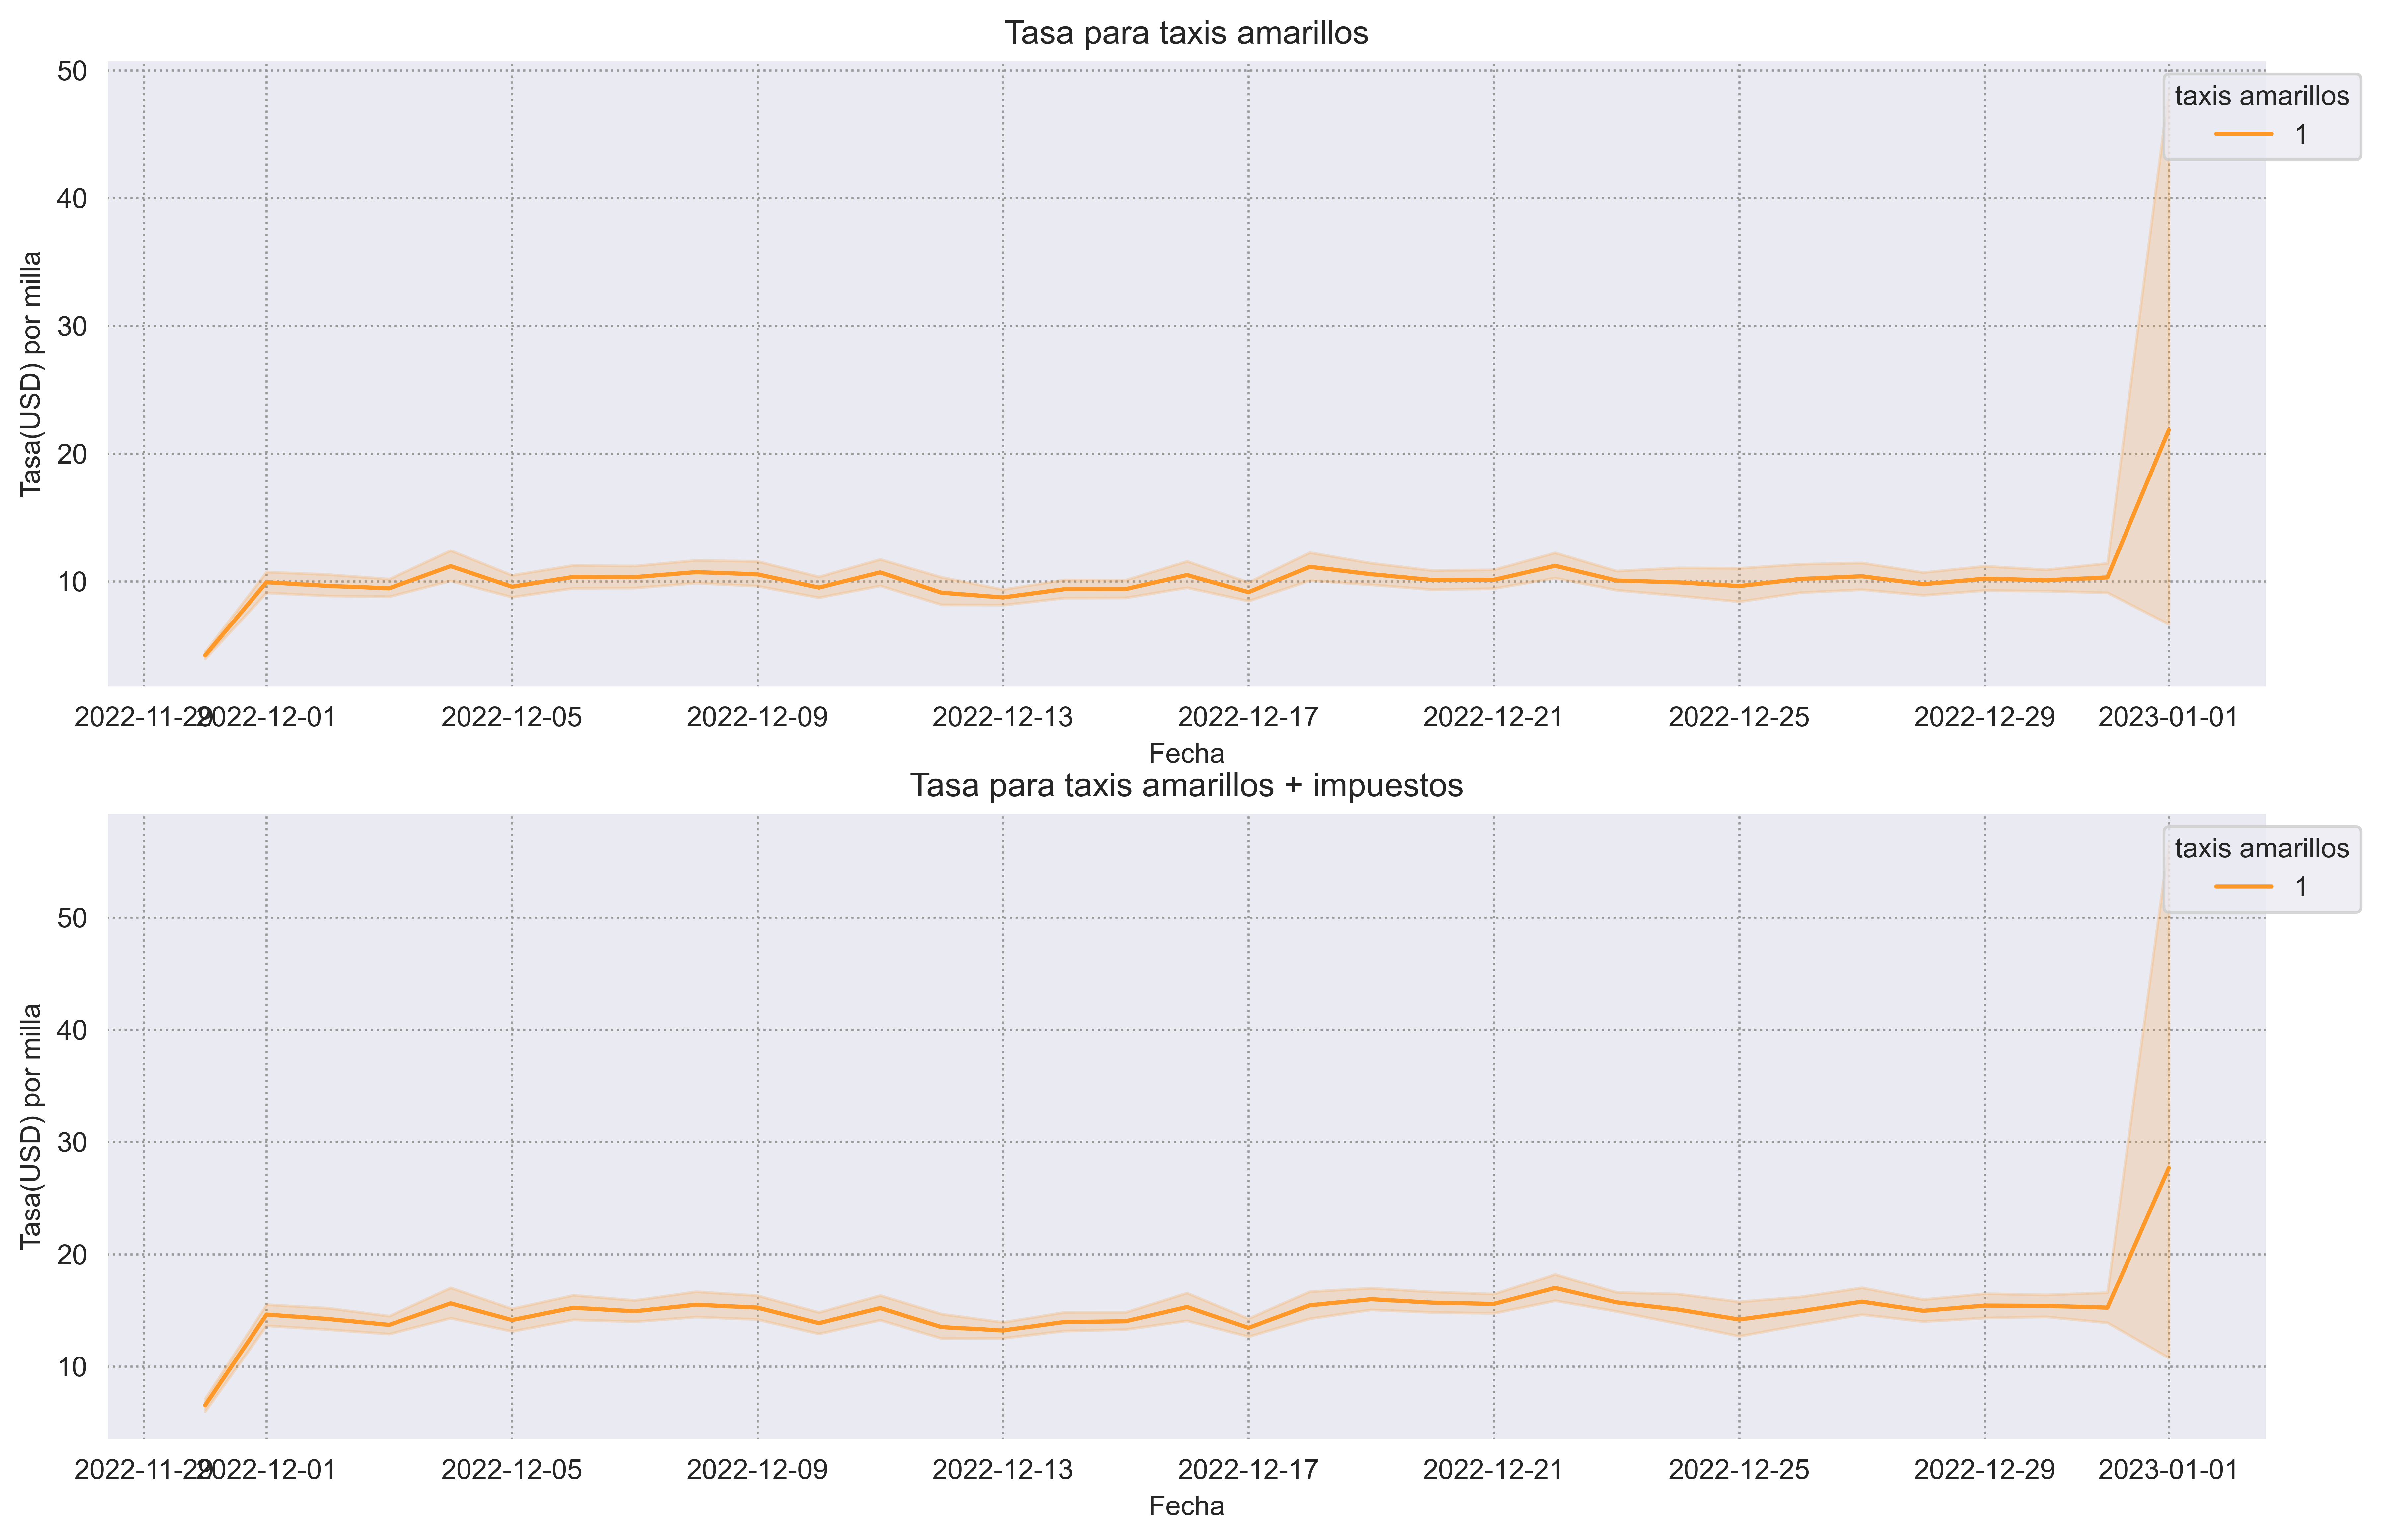

In [27]:
sns.set_style("darkgrid", {"grid.color": "0.6", "grid.linestyle": ":"}) # tema background seaborn

# Se crea Subplot de 2*1

fig, ax = plt.subplots(2, 1, figsize=(14, 9),dpi=600)

# Grafico 1 tasa USD taxis 

sns.lineplot(
    x = 'pickup_day',
    y = 'rate_per_mile',
    data = yellow_2022_13,
    hue = 1,
    markers = True,
    palette = "YlOrBr",
    ax=ax[0]
)

ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('Tasa(USD) por milla')
ax[0].set_title('Tasa para taxis amarillos')


# Leyenda
ax[0].legend(title='taxis amarillos', loc='upper right', bbox_to_anchor=(1.05, 1)) 

#  Grafica 2 tasa USD taxis con impuestos

sns.lineplot(
    x = 'pickup_day',
    y = 'total_per_mile',
    data = yellow_2022_13,
    hue = 1,
    markers = True,
    palette = "YlOrBr",
    ax=ax[1]
)
ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Tasa(USD) por milla')
ax[1].set_title('Tasa para taxis amarillos + impuestos')


# Leyenda
ax[1].legend(title='taxis amarillos', loc='upper right', bbox_to_anchor=(1.05, 1)) 

plt.show()

Es mínima la diferencia en la tendencia a primera vista.

## 2. Tarifa de viajes según origen/destino.

In [22]:
#Leer referencia de ubicación.
zona = pd.read_csv('../data/taxi_zone_lookup.csv')

In [24]:
#Agregar el dato de Borough a los dataframes para agrupar.

#Amarillos
yellow = yellow_2022_13.join(zona[['LocationID','Borough']].set_index('LocationID'), on = 'PULocationID')
yellow.rename(columns = {"Borough":"origin_borough"}, inplace = True)
yellow = yellow.join(zona[['LocationID','Borough']].set_index('LocationID'), on = 'DOLocationID')
yellow.rename(columns = {"Borough":"dest_borough"}, inplace = True)

In [25]:
yellow['fare_amount'] = yellow['fare_amount'].abs()
yellow['total_amount'] = yellow['total_amount'].abs()

tarifa del Viajes segun destino y origen

In [33]:
y = yellow[['origin_borough','total_amount']].groupby(by = 'origin_borough').mean() # origen

In [34]:
y1 = yellow[['dest_borough', 'total_amount']].groupby(by = 'dest_borough').mean()   # destino

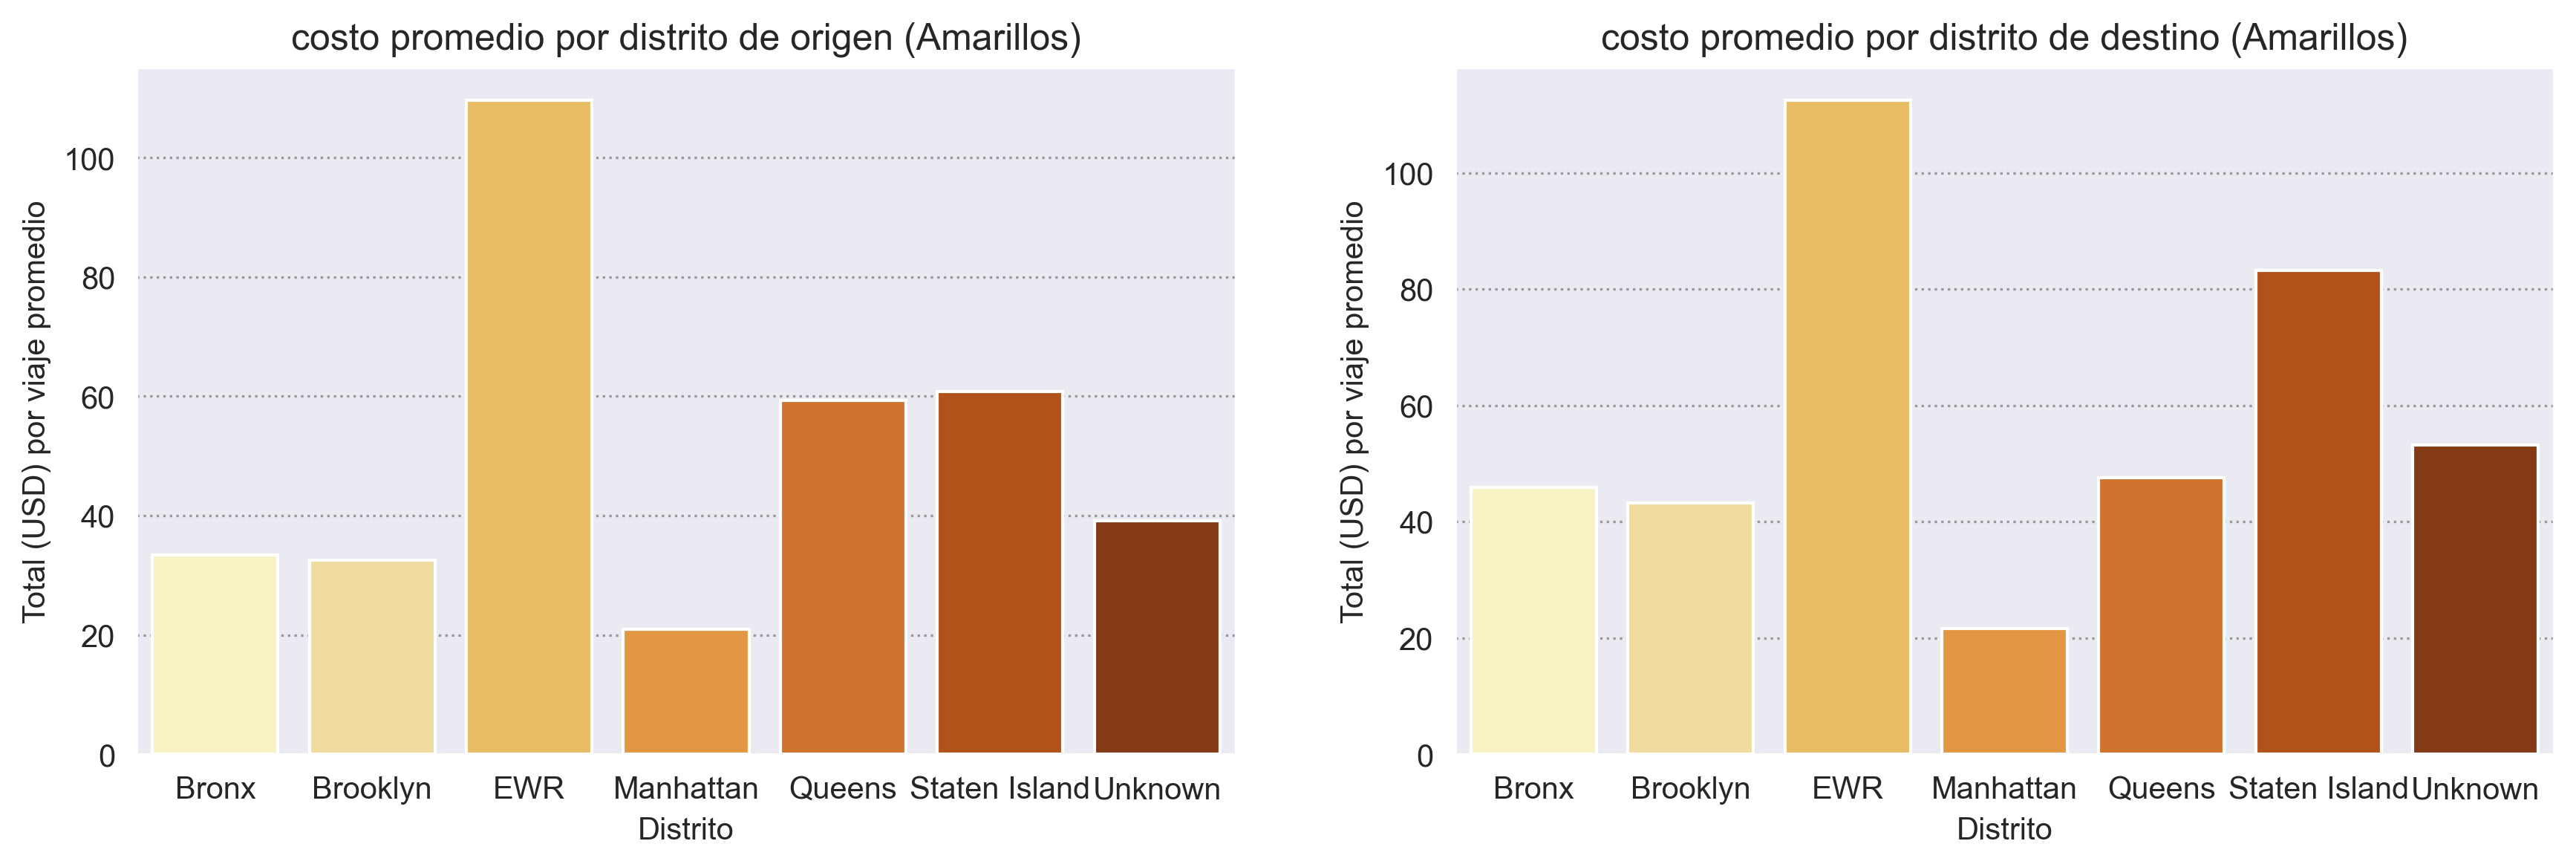

In [49]:
# Se crea Subplot de 2*1

fig, ax = plt.subplots(1, 2, figsize=(14, 4),dpi=300)

# viajes Según origen


sns.barplot(
    data = y,
    x = y.index,
    y = 'total_amount',
    palette = "YlOrBr",
    ax=ax[0]
)

ax[0].set_xlabel('Distrito')
ax[0].set_ylabel('Total (USD) por viaje promedio')
ax[0].set_title('costo promedio por distrito de origen (Amarillos)')


# viajes Según destino

sns.barplot(
    data = y1,
    x = y.index,
    y = 'total_amount',
    palette = "YlOrBr",
    ax=ax[1],
)
ax[1].set_xlabel('Distrito')
ax[1].set_ylabel('Total (USD) por viaje promedio')
ax[1].set_title('costo promedio por distrito de destino (Amarillos)')

plt.show()

## 3. Demanda según día de la semana.

In [50]:
yellow_2022_13['pickup_day'] = pd.to_datetime(yellow_2022_13['pickup_day'])

In [51]:
yellow = yellow_2022_13.set_index('pickup_day')

In [53]:
y_por_semana = yellow[['fare_amount']].groupby(yellow.index.dayofweek).count()
y_por_semana.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

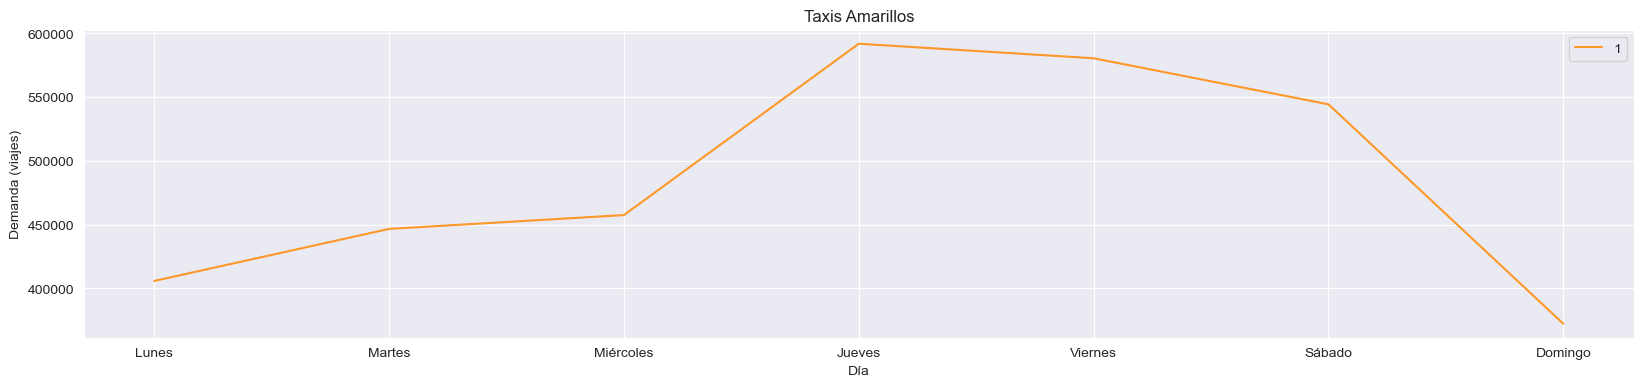

In [55]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize = (20, 4))

sns.lineplot(
    x = y_por_semana.index,
    y = 'fare_amount',
    data = y_por_semana,
    hue = 1,
    palette = 'YlOrBr'
)
ax.set_xlabel('Día')
ax.set_ylabel('Demanda (viajes)')
ax.set_title('Taxis Amarillos')

plt.show()

## 4. Facturación de viaje según día de la semana.

In [56]:
y_por_semana = yellow[['total_amount']].groupby(yellow.index.dayofweek).count()
y_por_semana.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

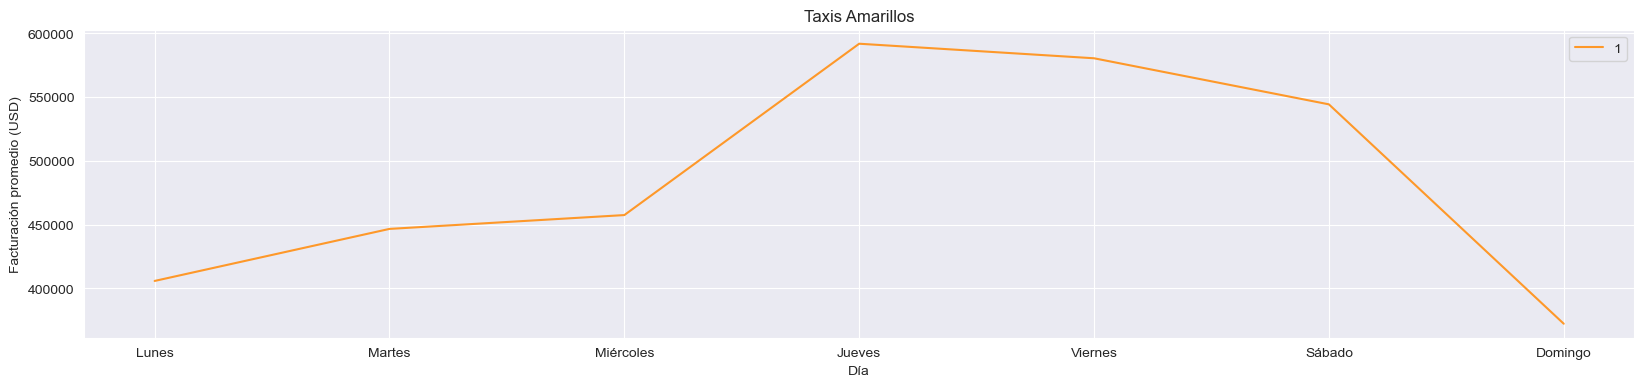

In [59]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize = (20, 4))

sns.lineplot(
    x = y_por_semana.index,
    y = 'total_amount',
    data = y_por_semana,
    hue = 1,
    palette = 'YlOrBr'
)
ax.set_xlabel('Día')
ax.set_ylabel('Facturación promedio (USD)')
ax.set_title('Taxis Amarillos')

plt.show()

## Matriz de correlación

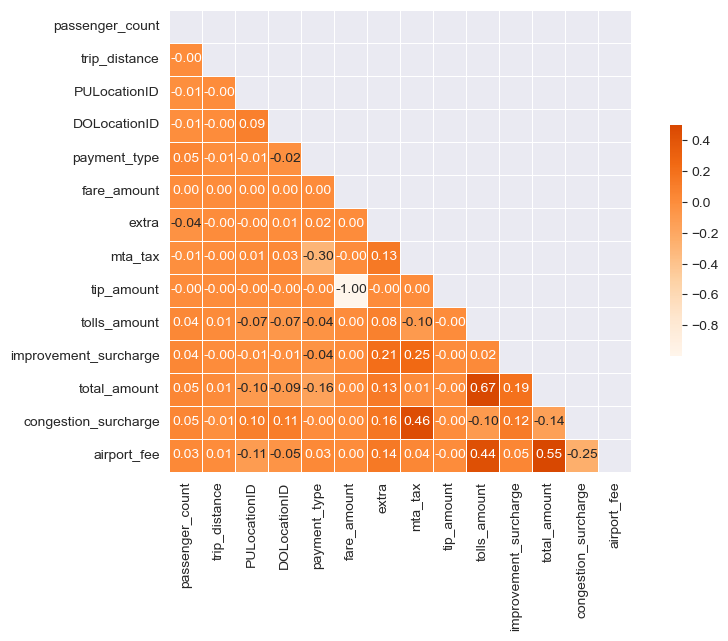

In [63]:
#Correlación taxis amarillos.


ycorr = yellow_2022_13[['passenger_count',
 'trip_distance',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
]].corr()
mask = np.triu(np.ones_like(ycorr, dtype = bool))

fig, ax = plt.subplots(figsize = (10,6))

sns.heatmap(ycorr, mask = mask,cmap="Oranges", vmax = 0.5, center = 0, square = True, linewidths = 0.5, 
            cbar_kws = {"shrink": 0.5}, annot= True,fmt='.2f')

plt.show()

* Relación inversamente proporcional entre el costo del viaje base (calculado al inicio) y la cantidad de propina dejada por el cliente.
* Las correlaciones más altas (0.4+) las da:
    - Costo total del viaje (total_amount) vs. peajes (tolls_amount).
    - Recargo de congestion (congestion_surcharge) vs. Impuesto MTA.
    - Tasa por aeropuerto vs. peajes.
    - Costo total del viaje vs. Tasa por aeropuerto.
